<a href="https://colab.research.google.com/github/oikn2018/CS6910_assignment_2/blob/main/model_training_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors
import time

(1000, 2) (1000,)


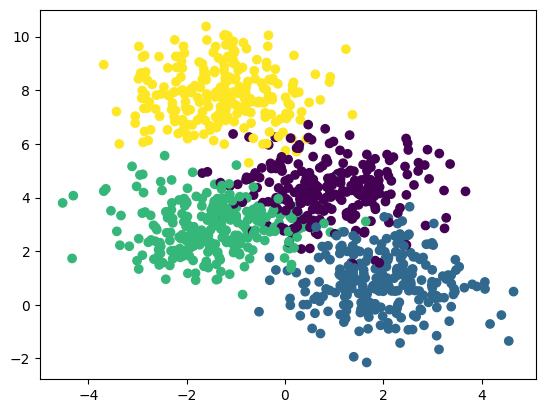

In [2]:
# Data Preparation
data, labels = make_blobs(n_samples=1000, centers = 4, n_features = 2, random_state = 0)
print(data.shape, labels.shape)
plt.scatter(data[:, 0], data[:, 1], c = labels)
plt.show()

In [3]:
# Dividing into Train and Validation sets
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
X_train, X_val, Y_train, Y_val =map (torch.tensor, (X_train, X_val, Y_train, Y_val))
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

torch.Size([750, 2]) torch.Size([750]) torch.Size([250, 2]) torch.Size([250])


In [42]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,256).double(),
        nn.ReLU(),
        nn.Linear(256,256).double(),
        nn.ReLU(),
        nn.Linear(256,128).double(),
        nn.ReLU(),
        nn.Linear(128,4).double(),
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [43]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred==y).float().mean()

In [44]:
def fit(x, y, model, opt, loss_fn, epochs = 1000):
  loss_arr = []
  acc_arr = []
  for epoch in range(epochs):
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, y).item())
    loss.backward()
    opt.step()
    opt.zero_grad()
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()

  print('Loss before training: ', loss_arr[0])
  print('Loss after training: ', loss_arr[-1])
  print('Accuracy after training: ', acc_arr[-1])
  return loss.item()

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


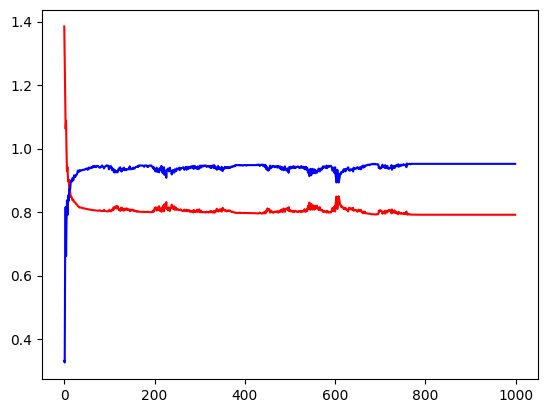

Loss before training:  1.3844559635027902
Loss after training:  0.7917251126061998
Accuracy after training:  0.9520000219345093


In [45]:
function = Model()
loss_fn = F.cross_entropy
# opt = optim.SGD(function.parameters(), lr = 1)
# opt = optim.SGD(function.parameters(), lr = 1, nesterov=True, momentum = 0.9) # Accuracy: 0.93
# opt = optim.RMSprop(function.parameters(), lr = 0.005) # Accuracy: 0.94
opt = optim.Adam(function.parameters(), lr = 0.005) # Accuracy: 0.95 
final_loss = fit(X_train, Y_train, function, opt, loss_fn)

In [ ]:
device = torch.device("cuda")
X_train = X_train.to(device)
Y_train = Y_train.to(device)
function = Model()
function.to(device)
tic = time.time()
print("Final Loss: ", fit(X_train, Y_train, function, opt, loss_fn))
toc = time.time()
print("Time taken: ", toc-tic)